# Ultrasonic Data
![LeNet Architecture](lenet.png)
Source: Simulated Data from Lester W. Schmerr Jr.

## Load and Consolidate data

Load the Flat bottom hole data and the annotation data

Loadfeatures input files of High and Low frequency component at level4 DWT

Group them to form an image of shape (4,128), inorder to enable padding using numpy

In [1]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
path="/home/kushal/Ultrasonic_CNN/"

def normalize_data(data):
    a = 0.1
    b = 0.9
    
    return a + ( ( (data - np.amin(data))*(b - a) )/( np.amin(data) - np.amax(data) ) )

#features input files of High and low frequency component at level4 For flaw category
dwt_llowband_file="Dwt_Data/dwt_ll4_fbh_124.txt"
dwt_lhighband_file="Dwt_Data/dwt_lh4_fbh_124.txt"
dwt_hlowband_file="Dwt_Data/dwt_hl4_fbh_124.txt"
dwt_hhighband_file="Dwt_Data/dwt_hh4_fbh_124.txt"

#features input files of High and low frequency component at level4 For No flaw category
dwt_nn_llowband_file="Dwt_Data/dwt_ll4_nonoise_124.txt"
dwt_nn_lhighband_file="Dwt_Data/dwt_lh4_nonoise_124.txt"
dwt_nn_hlowband_file="Dwt_Data/dwt_hl4_nonoise_124.txt"
dwt_nn_hhighband_file="Dwt_Data/dwt_hh4_nonoise_124.txt"

#load feature of flaw case
dwt_fbh_ll4=np.loadtxt(path+dwt_llowband_file)
dwt_fbh_lh4=np.loadtxt(path+dwt_lhighband_file)
dwt_fbh_hl4=np.loadtxt(path+dwt_hlowband_file)
dwt_fbh_hh4=np.loadtxt(path+dwt_hhighband_file)

#load feature of flaw case
dwt_nn_ll4=np.loadtxt(path+dwt_nn_llowband_file)
dwt_nn_lh4=np.loadtxt(path+dwt_nn_lhighband_file)
dwt_nn_hl4=np.loadtxt(path+dwt_nn_hlowband_file)
dwt_nn_hh4=np.loadtxt(path+dwt_nn_hhighband_file)

# Check for the number of features to be same
assert(len(dwt_fbh_ll4) == len(dwt_fbh_lh4))
assert(len(dwt_fbh_lh4) == len(dwt_fbh_hl4))
assert(len(dwt_fbh_hl4) == len(dwt_fbh_hh4))
assert(len(dwt_fbh_hh4) == len(dwt_nn_ll4))
assert(len(dwt_nn_ll4) == len(dwt_nn_lh4))
assert(len(dwt_nn_lh4) == len(dwt_nn_hl4))
assert(len(dwt_nn_hl4) == len(dwt_nn_hh4))

print()
print("Total data available: {}".format(len(dwt_fbh_ll4)+len(dwt_nn_ll4)))
print()
print("Data in Positive class: {}".format(len(dwt_fbh_ll4)))
print()
print("Data in Negetive class: {}".format(len(dwt_nn_ll4)))
print()


# Group different frequency components of same data together
X_p=[]
y_p=[]

for i in range(len(dwt_fbh_ll4)):
    temp_input=np.array([dwt_fbh_ll4[i,:],dwt_fbh_lh4[i,:],dwt_fbh_hl4[i,:],dwt_fbh_hh4[i,:]])
    temp_input=np.absolute(temp_input)
    temp_input=np.reshape(temp_input,(4,128,1))
    temp_input=normalize_data(temp_input)
    temp_y=2
    X_p.append(temp_input)
    y_p.append(temp_y)
X_n=[]
y_n=[]
for i in range(len(dwt_nn_ll4)):
    temp_input=np.array([dwt_nn_ll4[i,:],dwt_nn_lh4[i,:],dwt_nn_hl4[i,:],dwt_nn_hh4[i,:]])
    temp_input=np.absolute(temp_input)
    temp_input=np.reshape(temp_input,(4,128,1))
    temp_input=normalize_data(temp_input)
    temp_y=1
    X_n.append(temp_input)
    y_n.append(temp_y)

X_p, y_p = shuffle(X_p, y_p)

X_n, y_n = shuffle(X_n, y_n)

Xp_train,Xp_test,yp_train,yp_test=train_test_split(X_p,y_p,test_size=0.1,random_state=0)
Xp_train,Xp_validation,yp_train,yp_validation=train_test_split(Xp_train,yp_train,test_size=0.1,random_state=0)

Xn_train,Xn_test,yn_train,yn_test=train_test_split(X_n,y_n,test_size=0.1,random_state=0)
Xn_train,Xn_validation,yn_train,yn_validation=train_test_split(Xn_train,yn_train,test_size=0.1,random_state=0)

X_train=np.vstack((Xp_train,Xn_train))
y_train=np.hstack((yp_train,yn_train))
X_test=np.vstack((Xp_test,Xn_test))
y_test=np.hstack((yp_test,yn_test))
X_validation=np.vstack((Xp_validation,Xn_validation))
y_validation=np.hstack((yp_validation,yn_validation))




print()
print("Shape of X_train: {}".format(np.shape(X_train)))
print()
print()
print("Shape of y_train: {}".format(np.shape(y_train)))
print()


/home/kushal/anaconda3/envs/Ultrasonic_CNN_LN/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/kushal/anaconda3/envs/Ultrasonic_CNN_LN/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/kushal/anaconda3/envs/Ultrasonic_CNN_LN/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/kushal/anaconda3/envs/Ultrasonic_CNN_LN/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)



Total data available: 1078

Data in Positive class: 539

Data in Negetive class: 539


Shape of X_train: (872, 4, 128, 1)


Shape of y_train: (872,)



## Split Data set into train/validation/test sets.

30% of total data is reservered for testing.
25% of the remaining data(70%) is used for validation.
75% of the remaining data(70%) is used for training 

In [2]:


assert(len(X_test) == len(y_test))
assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
print("Test Set:       {} samples".format(len(X_test)))
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))

Test Set:       108 samples
Training Set:   872 samples
Validation Set: 98 samples


The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

You do not need to modify this section.

In [3]:
# Pad images with 0s
X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
print("Updated Image Shape: {}".format(X_train[0].shape))

Updated Image Shape: (8, 132, 1)


## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

1


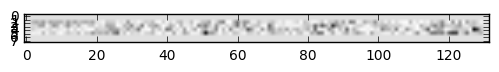

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure()
plt.imshow(image, cmap="gray")
print(y_train[index])

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [5]:
X_train, y_train = shuffle(X_train, y_train)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [6]:
import tensorflow as tf

EPOCHS = 5
BATCH_SIZE = 100

/home/kushal/anaconda3/envs/Ultrasonic_CNN_LN/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Implementation based on LeNet
First Architecture inspired from [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This architecture is given the name UltraNDT-LeNet.

### Input
The UltraNDT-LeNet accepts input of size 6x132x1

### Architecture
**Layer 1: Convolutional.** The output shape will be 6x128x8.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 3x64x6.

**Layer 2: Convolutional.** The output shape should be 3x60x20.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 2x30x20.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 600 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 300 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 128 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [19]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    Filter_Weights1=tf.Variable(tf.truncated_normal((2,10,1,6),mean=mu,stddev=sigma))
    Filter_Bias1=tf.Variable(tf.zeros(6))
    Filter_Weights2=tf.Variable(tf.truncated_normal((2,10,6,16),mean=mu,stddev=sigma))
    Filter_Bias2=tf.Variable(tf.zeros(16))
    FNN_Weights3=tf.Variable(tf.truncated_normal((864,500),mean=mu,stddev=sigma))
    FNN_Bias3=tf.Variable(tf.zeros(500))
    FNN_Weights4=tf.Variable(tf.truncated_normal((500,250),mean=mu,stddev=sigma))
    FNN_Bias4=tf.Variable(tf.zeros(250))
    FNN_Weights5=tf.Variable(tf.truncated_normal((250,2),mean=mu,stddev=sigma))
    FNN_Bias5=tf.Variable(tf.zeros(2))
    
    print(x)
    Layer1=tf.nn.conv2d(x,Filter_Weights1,strides=[1,1,1,1],padding='VALID')
    Layer1=tf.nn.bias_add(Layer1,Filter_Bias1)
    
    Layer1=tf.nn.relu(Layer1)
    print(Layer1)
    Layer1=tf.nn.max_pool(Layer1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
    print(Layer1)
    Layer2=tf.nn.conv2d(Layer1,Filter_Weights2,strides=[1,1,1,1],padding='VALID')
    Layer2=tf.nn.bias_add(Layer2,Filter_Bias2)
    
    Layer2=tf.nn.relu(Layer2)
    print(Layer2)
    Layer2=tf.nn.max_pool(Layer2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
    print(Layer2)
    Layer2=flatten(Layer2)
    print(Layer2)
    Layer3=tf.add(tf.matmul(Layer2,FNN_Weights3),FNN_Bias3)
    
    Layer3=tf.nn.relu(Layer3)
    print(Layer3)
    Layer4=tf.add(tf.matmul(Layer3,FNN_Weights4),FNN_Bias4)
   
    Layer4=tf.nn.relu(Layer4)
    print(Layer4)
    logits=tf.add(tf.matmul(Layer4,FNN_Weights5),FNN_Bias5)
    
    print(logits)
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [20]:
x = tf.placeholder(tf.float32, (None, 8, 132, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 2)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [21]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Tensor("Placeholder_8:0", shape=(?, 8, 132, 1), dtype=float32)
Tensor("Relu_12:0", shape=(?, 7, 123, 6), dtype=float32)
Tensor("MaxPool_6:0", shape=(?, 4, 62, 6), dtype=float32)
Tensor("Relu_13:0", shape=(?, 3, 53, 16), dtype=float32)
Tensor("MaxPool_7:0", shape=(?, 2, 27, 16), dtype=float32)
Tensor("Flatten_3/flatten/Reshape:0", shape=(?, 864), dtype=float32)
Tensor("Relu_14:0", shape=(?, 500), dtype=float32)
Tensor("Relu_15:0", shape=(?, 250), dtype=float32)
Tensor("Add_11:0", shape=(?, 2), dtype=float32)


## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [23]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [25]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './ultra_lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.500

EPOCH 2 ...
Validation Accuracy = 0.500

EPOCH 3 ...
Validation Accuracy = 0.949

EPOCH 4 ...
Validation Accuracy = 0.500

EPOCH 5 ...
Validation Accuracy = 0.939

Model saved


## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [26]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./ultra_lenet
Test Accuracy = 0.944


(101, 155)
Updated Image Shape of exp data: (8, 132, 1)
2
INFO:tensorflow:Restoring parameters from ./ultra_lenet
Test Accuracy = 0.921


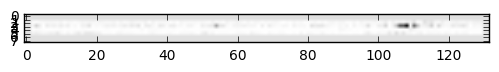

In [27]:
import numpy as np

def normalize_data(data):
    a = 0.1
    b = 0.9
    
    return a + ( ( (data - np.amin(data))*(b - a) )/( np.amin(data) - np.amax(data) ) )


path="/home/kushal/Ultrasonic_CNN/"
dwt_llowband_file="Dwt_Data/dwt_ll4_exp_124.txt"
dwt_lhighband_file="Dwt_Data/dwt_lh4_exp_124.txt"
dwt_hlowband_file="Dwt_Data/dwt_hl4_exp_124.txt"
dwt_hhighband_file="Dwt_Data/dwt_hh4_exp_124.txt"

dwt_exp_ll4=np.loadtxt(path+dwt_llowband_file)
dwt_exp_lh4=np.loadtxt(path+dwt_lhighband_file)
dwt_exp_hl4=np.loadtxt(path+dwt_hlowband_file)
dwt_exp_hh4=np.loadtxt(path+dwt_hhighband_file)


print(np.shape(dwt_exp_ll4))

X_exp=[]
y_exp=[]

for i in range(len(dwt_exp_ll4)):
    temp_input=np.array([dwt_exp_ll4[i,15:143],dwt_exp_lh4[i,15:143],dwt_exp_hl4[i,15:143],dwt_exp_hh4[i,15:143]])
    temp_input=np.absolute(temp_input)
    temp_input=np.reshape(temp_input,(4,128,1))
    temp_input=normalize_data(temp_input)
    temp_y=2
    X_exp.append(temp_input)
    y_exp.append(temp_y)
    

    
X_exp= np.pad(X_exp, ((0,0),(2,2),(2,2),(0,0)), 'constant')

print("Updated Image Shape of exp data: {}".format(X_exp[0].shape))


import random
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_exp))
image = X_exp[index].squeeze()

plt.figure()
plt.imshow(image, cmap="gray")
print(y_exp[index])

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_exp, y_exp)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
